# Análise do Mercado de Ações



Os dados da série temporal são uma série de pontos de dados indexados em ordem temporal. Dados de séries temporais estão em toda parte, então manipulá-los é importante para qualquer analista de dados ou cientista de dados.

Neste caderno, descobriremos e exploraremos dados do mercado de ações, particularmente algumas ações de tecnologia (Apple, Amazon, Google e Microsoft). Aprenderemos como usar o yfinance para obter informações sobre ações e visualizar diferentes aspectos delas usando Seaborn e Matplotlib. veremos algumas formas de analisar o risco de uma ação, com base em seu histórico de desempenho anterior. Também estaremos prevendo os preços futuros das ações por meio de um método de Memória de Longo Curto Prazo (LSTM)!

Estaremos respondendo as seguintes perguntas ao longo do caminho:

    1.) Qual foi a variação no preço da ação ao longo do tempo?
    2.) Qual foi o retorno diário da ação em média?
    3.) Qual foi a média móvel das várias ações?
    4.) Qual foi a correlação entre diferentes ações?
    5.) Quanto valor colocamos em risco ao investir em uma determinada ação?
    6.) Como podemos tentar prever o comportamento futuro das ações? (Prevendo o preço de fechamento das ações da APPLE inc usando LSTM)

***  

## Obtendo os dados
O primeiro passo é obter os dados e carregá-los na memória. Obteremos nossos dados de estoque no site do Yahoo Finance. O Yahoo Finance é um rico recurso de dados e ferramentas do mercado financeiro para encontrar investimentos atraentes. Para obter os dados do Yahoo Finance, usaremos a biblioteca yfinance, que oferece uma maneira segmentada e Pythonic de baixar dados de mercado do Yahoo. Confira este artigo para saber mais sobre o yfinance: [Baixe dados históricos de mercado de forma confiável com Python](https://aroussi.com/post/python-yahoo-finance)

# 1. Qual foi a variação no preço da ação ao longo do tempo?

Nesta seção, veremos como lidar com a solicitação de informações de ações com pandas e como analisar os atributos básicos de uma ação.

In [1]:
!pip install -q yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 965.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 5.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Para ler dados de ações do yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

from datetime import datetime


# As ações de tecnologia que usaremos para esta análise
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Configure os horários de término e início para coleta de dados
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-02-28,93.139999,94.690002,92.919998,94.230003,94.230003,43959300,AMAZON
2023-03-01,93.870003,94.680000,91.589996,92.169998,92.169998,52299500,AMAZON
2023-03-02,91.410004,92.230003,90.389999,92.129997,92.129997,55509400,AMAZON
2023-03-03,92.739998,94.940002,92.660004,94.900002,94.900002,55695300,AMAZON
2023-03-06,95.190002,96.550003,93.739998,93.750000,93.750000,52112400,AMAZON
2023-03-07,94.059998,95.089996,92.779999,93.550003,93.550003,49100700,AMAZON
2023-03-08,93.599998,94.169998,92.180000,93.919998,93.919998,44899100,AMAZON
2023-03-09,93.680000,96.209999,92.180000,92.250000,92.250000,56218700,AMAZON
2023-03-10,92.669998,93.570000,90.250000,90.730003,90.730003,69747500,AMAZON


Revendo o conteúdo de nossos dados, podemos ver que os dados são numéricos e a data é o índice dos dados. Observe também que os fins de semana estão faltando nos registros.

**Nota rápida:** Usar `globals()` é uma maneira desleixada de definir os nomes `DataFrame`, mas é simples. Agora que temos nossos dados, vamos realizar algumas análises básicas de dados e verificar nossos dados.

## Estatísticas descritivas sobre os dados
`.describe()` gera estatísticas descritivas. As estatísticas descritivas incluem aquelas que resumem a tendência central, a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores "NaN".

Analisa séries numéricas e de objetos, bem como conjuntos de colunas `DataFrame` de tipos de dados mistos. A saída irá variar dependendo do que é fornecido. Consulte as notas abaixo para obter mais detalhes.

In [3]:
# Estatísticas resumidas
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,150.095180,152.186454,148.190040,150.281753,149.783817,8.261105e+07
std,11.894518,11.831522,11.948586,11.944203,11.779275,2.418425e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,8.240090e+06
25%,142.110001,143.854996,139.949997,142.464996,141.973427,6.776600e+07
50%,148.899994,150.860001,147.240005,149.350006,148.910004,7.766360e+07
75%,156.845001,159.090004,154.435005,156.849998,156.238129,9.148545e+07
max,178.550003,179.610001,176.699997,178.960007,177.882462,1.826020e+08


Temos apenas 255 registros em um ano porque os finais de semana não estão incluídos nos dados.

## Informações sobre os dados
O método `.info()` imprime informações sobre um DataFrame, incluindo o índice `dtype` e colunas, valores não nulos e uso de memória.

In [4]:
# Informações gerais
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-03-14 to 2023-03-13
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


## Preço final

O preço de fechamento é o último preço pelo qual a ação é negociada durante o dia normal de negociação. O preço de fechamento de uma ação é a referência padrão usada pelos investidores para acompanhar seu desempenho ao longo do tempo.

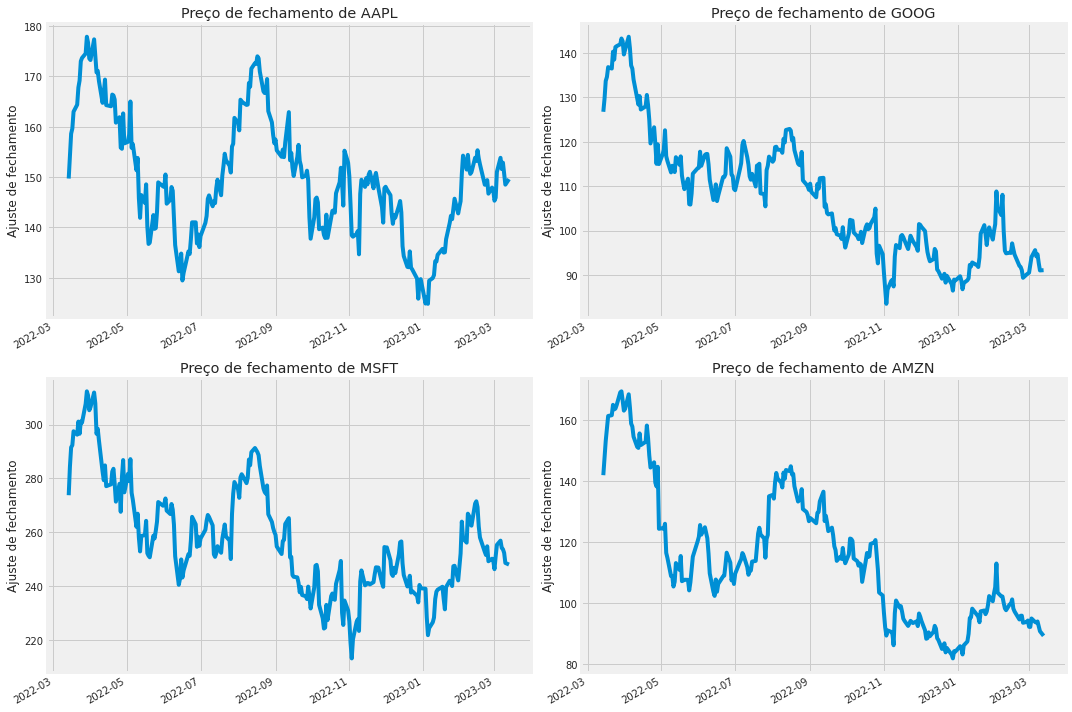

In [48]:
# Vamos ver uma visão histórica do preço de fechamento
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Ajuste de fechamento')
    plt.xlabel(None)
    plt.title(f"Preço de fechamento de {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume de Vendas
Volume é a quantidade de um ativo ou título que muda de mãos em algum período de tempo, geralmente ao longo de um dia. Por exemplo, o volume de negociação de ações se referiria ao número de ações de segurança negociadas entre a abertura e o fechamento diários. O volume de negociação e as alterações no volume ao longo do tempo são informações importantes para os traders técnicos.

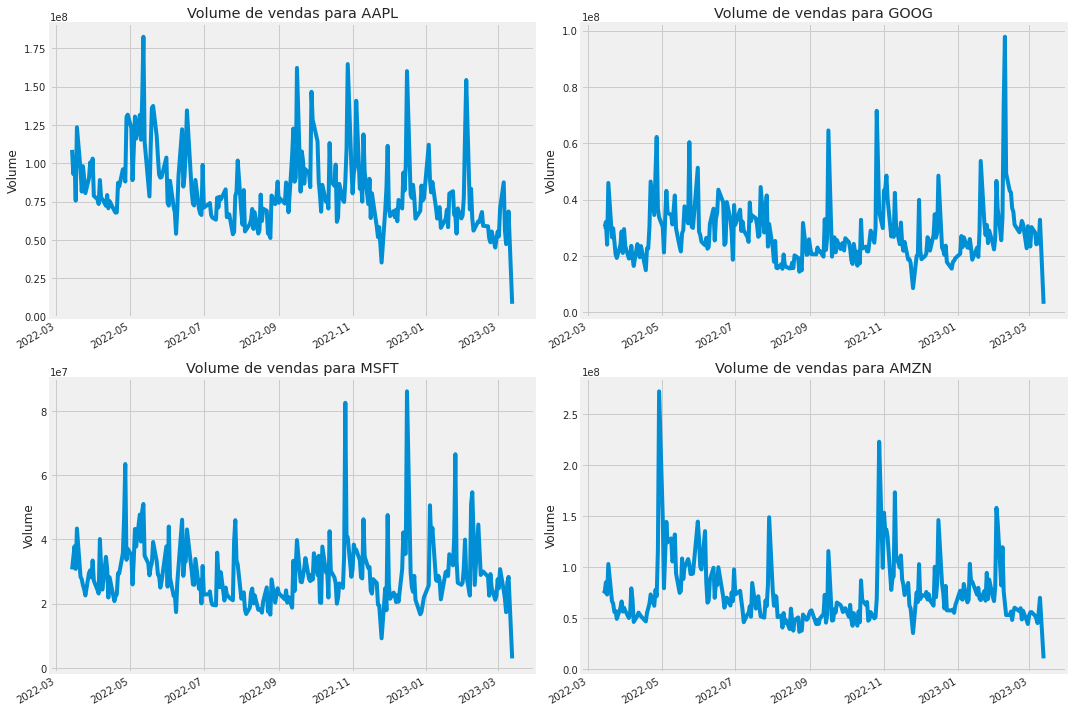

In [47]:
# Agora vamos plotar o volume total de ações negociadas a cada dia
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume de vendas para {tech_list[i - 1]}")
    
plt.tight_layout()

Agora que vimos as visualizações do preço de fechamento e do volume negociado a cada dia, vamos calcular a média móvel da ação.

# 2. Qual foi a média móvel das várias ações?

A média móvel (MA) é uma ferramenta simples de análise técnica que suaviza os dados de preços criando um preço médio constantemente atualizado. A média é tomada durante um período de tempo específico, como 10 dias, 20 minutos, 30 semanas ou qualquer período de tempo que o trader escolher.

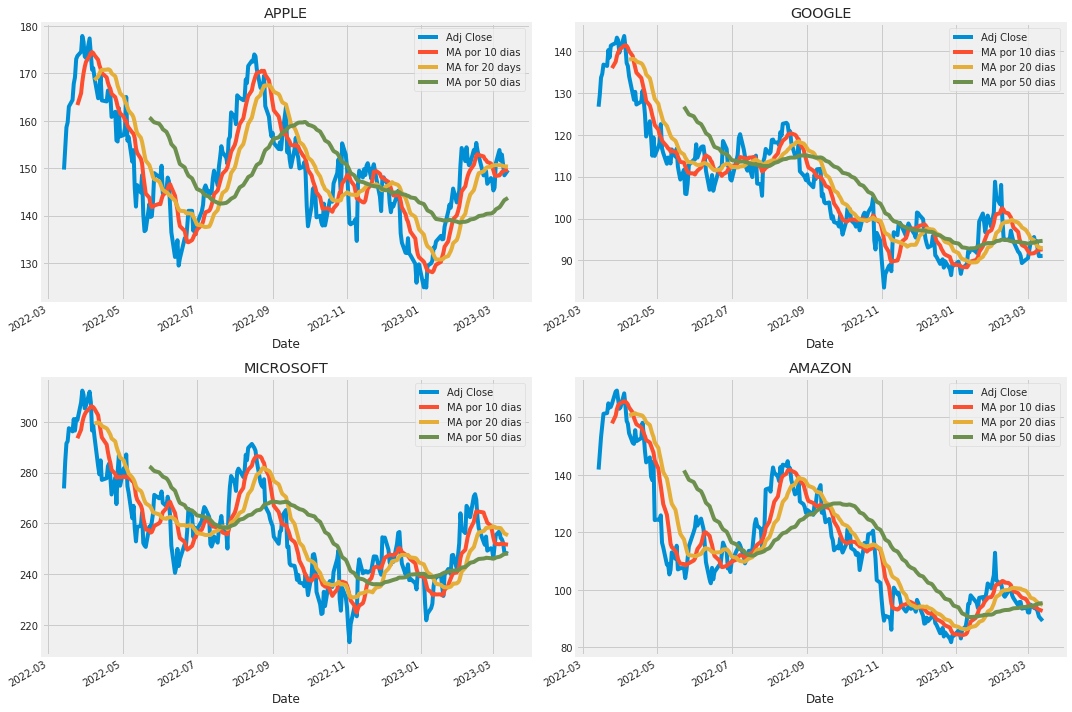

In [46]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA por {ma} dias"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA por 10 dias', 'MA for 20 days', 'MA por 50 dias']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA por 10 dias', 'MA por 20 dias', 'MA por 50 dias']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA por 10 dias', 'MA por 20 dias', 'MA por 50 dias']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA por 10 dias', 'MA por 20 dias', 'MA por 50 dias']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Vemos no gráfico que os melhores valores para medir a média móvel são 10 e 20 dias porque ainda capturamos tendências nos dados sem ruído.

# 3. Qual foi o retorno diário da ação em média?

Agora que fizemos algumas análises básicas, vamos em frente e nos aprofundar um pouco mais. Agora vamos analisar o risco da ação. Para isso, precisamos observar mais de perto as variações diárias da ação, e não apenas seu valor absoluto. Vamos usar pandas para recuperar os retornos diários das ações da Apple.

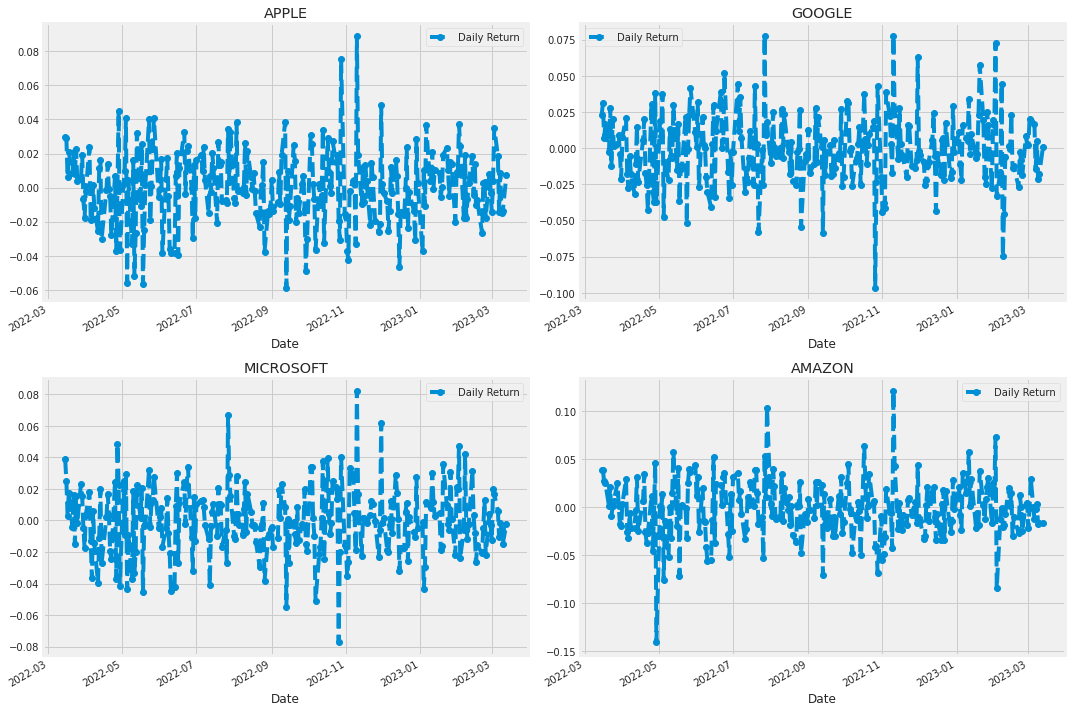

In [34]:
# Usaremos pct_change para encontrar a variação percentual de cada dia
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Em seguida, traçaremos a porcentagem de retorno diário
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Agora vamos dar uma olhada geral no retorno médio diário usando um histograma. Usaremos seaborn para criar um histograma e um gráfico kde na mesma figura.

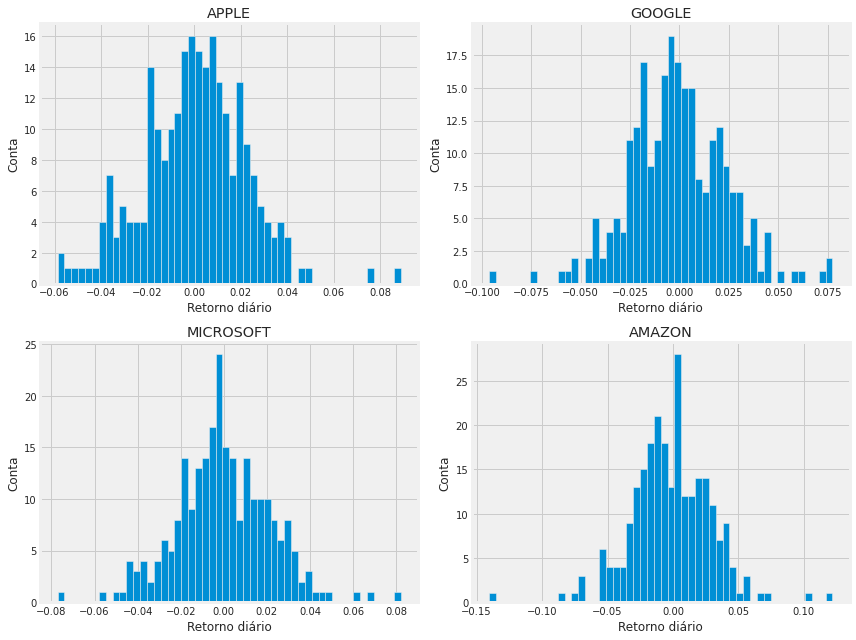

In [32]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Retorno diário')
    plt.ylabel('Conta')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. Qual foi a correlação entre os preços de fechamento de diferentes ações?

A correlação é uma estatística que mede o grau em que duas variáveis ​​se movem em relação uma à outra, cujo valor deve estar entre -1,0 e +1,0. A correlação mede a associação, mas não mostra se x causa y ou vice-versa — ou se a associação é causada por um terceiro fator[1].

Agora, e se quiséssemos analisar os retornos de todas as ações da nossa lista? Vamos construir um DataFrame com todas as colunas ['Close'] para cada um dos dataframes de ações.

In [10]:
# Pega todos os preços de fechamento da lista de ações de tecnologia em um DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Retorna DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-14,NaN,NaN,NaN,NaN
2022-03-15,0.029678,0.038868,0.023035,0.038743
2022-03-16,0.029015,0.038934,0.031081,0.025213
2022-03-17,0.006454,0.027008,0.006807,0.002820
2022-03-18,0.020919,0.025512,0.016352,0.017648


Agora podemos comparar o retorno percentual diário de duas ações para verificar a correlação. Primeiro vamos ver um sotck comparado a si mesmo.

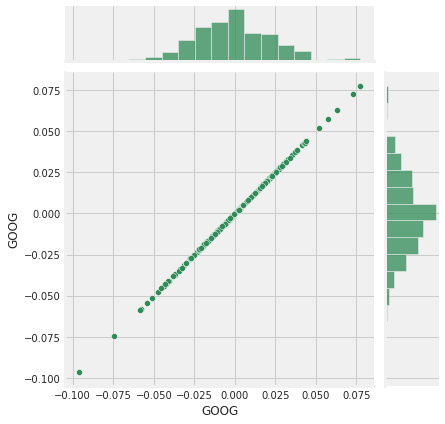

In [11]:
# Compara o Google e mostrar uma relação perfeitamente linear
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

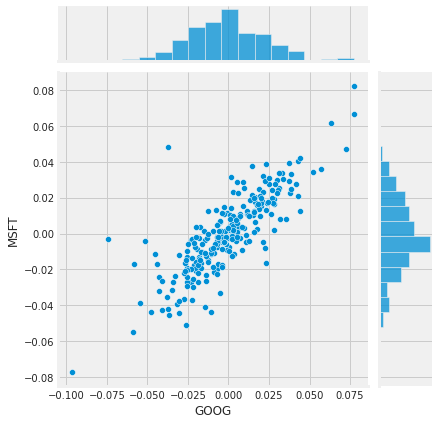

In [12]:
# Usaremos o joinplot para comparar os retornos diários do Google e da Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

Portanto, agora podemos ver que, se duas ações estiverem perfeitamente (e positivamente) correlacionadas entre si, deve ocorrer uma relação linear entre seus valores de retorno diário.

Seaborn e pandas tornam muito fácil repetir essa análise de comparação para todas as combinações possíveis de ações em nossa lista de cotações de ações de tecnologia. Podemos usar sns.pairplot() para criar automaticamente este gráfico.

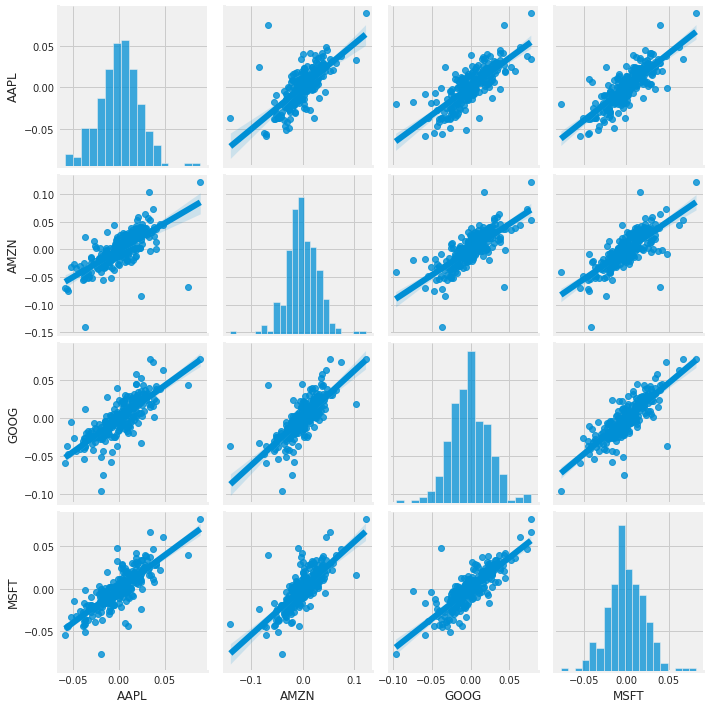

In [13]:
# Podemos simplesmente chamar pairplot em nosso DataFrame para uma análise visual automática de todas as comparações

sns.pairplot(tech_rets, kind='reg')

Acima podemos ver todas as relações de retornos diários entre todas as ações. Uma rápida olhada mostra uma correlação interessante entre os retornos diários do Google e da Amazon. Pode ser interessante investigar essa prisão individual.

Embora a simplicidade de apenas chamar `sns.pairplot()` seja fantástica, também podemos usar `sns.PairGrid()` para controle total da figura, incluindo que tipo de gráfico vai na diagonal, o triângulo superior e o inferior triângulo. Abaixo está um exemplo de utilização de todo o poder do seaborn para alcançar este resultado.

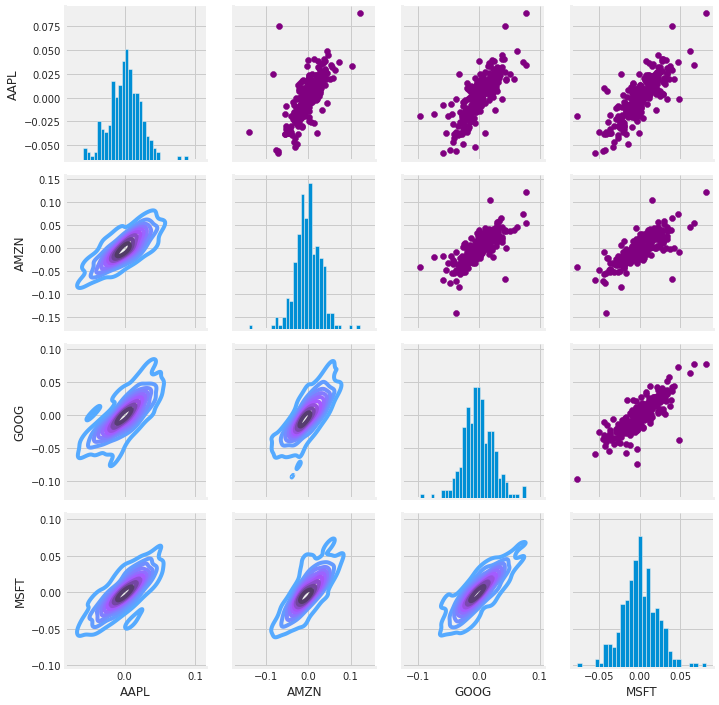

In [14]:
# Configure nossa figura nomeando return_fig, chama PairPLot no DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Usando map_upper podemos especificar como será o triângulo superior.
return_fig.map_upper(plt.scatter, color='purple')

# Também podemos definir o triângulo inferior na figura, incluindo o tipo de gráfico (kde)
# ou o mapa de cores (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Por fim, definiremos a diagonal como uma série de gráficos de histograma do retorno diário
return_fig.map_diag(plt.hist, bins=30)

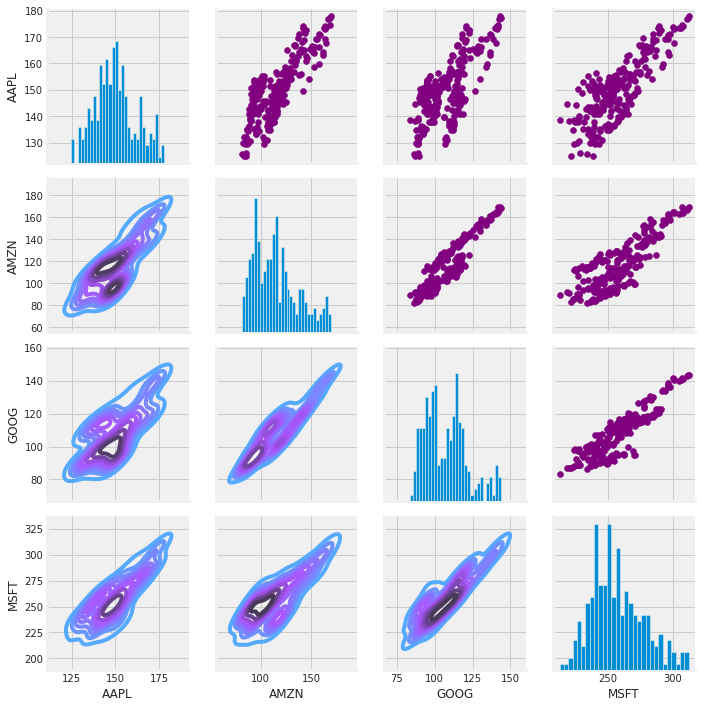

In [15]:
# Configure nossa figura nomeando return_fig, chame PairPLot no DataFrame
returns_fig = sns.PairGrid(closing_df)

# Usando map_upper, podemos especificar como será o triângulo superior.
returns_fig.map_upper(plt.scatter,color='purple')

# Também podemos definir o triângulo inferior na figura, incluindo o tipo de gráfico (kde) ou o mapa de cores (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Por fim, definiremos a diagonal como uma série de gráficos de histograma do retorno diário
returns_fig.map_diag(plt.hist,bins=30)

Finalmente, também poderíamos fazer um gráfico de correlação, para obter valores numéricos reais para a correlação entre os valores de retorno diário das ações. Ao comparar os preços de fechamento, vemos uma relação interessante entre Microsoft e Apple.

Text(0.5, 1.0, 'Correlação do preço de fechamento das ações')

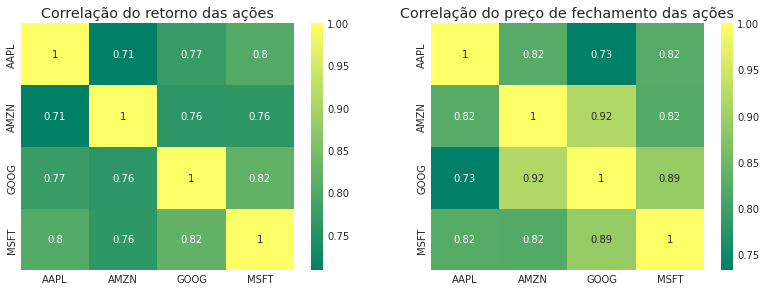

In [31]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlação do retorno das ações')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlação do preço de fechamento das ações')

Assim como suspeitávamos em nosso `PairPlot`, vemos aqui numericamente e visualmente que a Microsoft e a Amazon tiveram a correlação mais forte de retorno diário de ações. Também é interessante ver que todas as empresas de tecnologia estão positivamente correlacionadas.

# 5. Quanto colocamos em risco ao investir em uma determinada ação?

Existem muitas maneiras de quantificar o risco, uma das maneiras mais básicas de usar as informações que reunimos sobre os retornos percentuais diários é comparando o retorno esperado com o desvio padrão dos retornos diários.

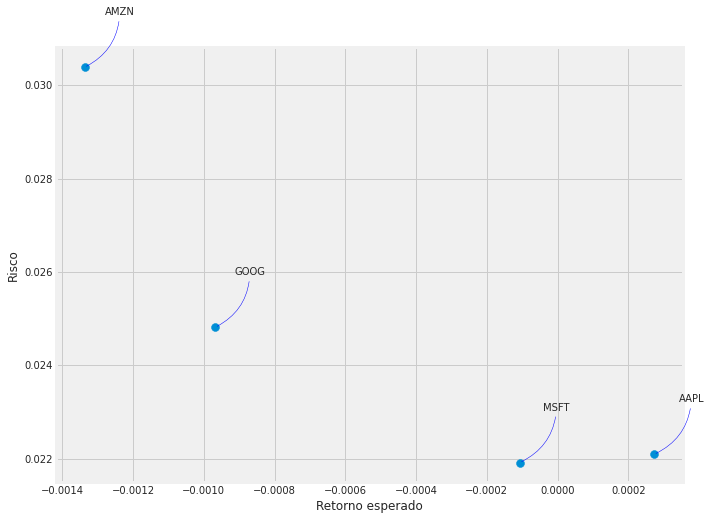

In [30]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Retorno esperado')
plt.ylabel('Risco')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of APPLE inc:

In [18]:
# Obtem a cotação da ação
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Mostra os dados
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500189,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567370,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706895,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839728,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819362,394024400
...,...,...,...,...,...,...
2023-03-07,153.699997,154.029999,151.130005,151.600006,151.600006,56182000
2023-03-08,152.809998,153.470001,151.830002,152.869995,152.869995,47204800
2023-03-09,153.559998,154.539993,150.229996,150.589996,150.589996,53833600


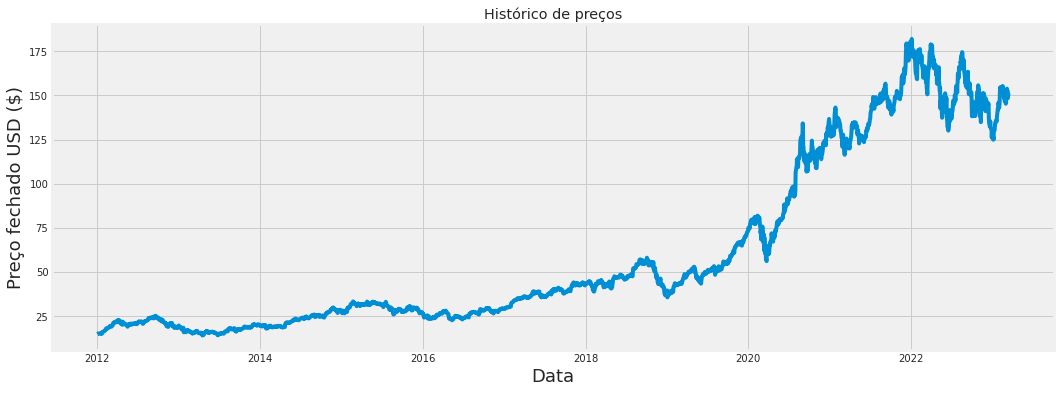

In [28]:
plt.figure(figsize=(16,6))
plt.title('Histórico de preços')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Preço fechado USD ($)', fontsize=18)
plt.show()

In [20]:
# Cria um novo dataframe apenas com a coluna "Close"
data = df.filter(['Close'])
# Converte o dataframe em uma matriz numpy
dataset = data.values
# Obtem o número de linhas para treinar o modelo
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2676

In [21]:
# Dimensiona os dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.81304575],
       [0.80060992],
       [0.81756793]])

In [22]:
# Cria o conjunto de dados de treinamento
train_data = scaled_data[0:int(training_data_len), :]
# Divide os dados em  x_train e y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Converte x_train e y_train em matrizes numpy
x_train, y_train = np.array(x_train), np.array(y_train)

# Reformula os dados
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Construi o modelo LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compila o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treina o modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

2616/2616 [==============================] - 116s 43ms/step - loss: 0.0018


In [24]:
# Crie o conjunto de dados de teste
# Crie um novo array contendo valores escalados do índice 1543 a 2002
test_data = scaled_data[training_data_len - 60: , :]
# Criar os conjuntos de dados x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Converte os dados em uma matriz numpy
x_test = np.array(x_test)

# Reformula os dados
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Obtem os valores de preços previstos pelos modelos
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Obtem a raiz do erro quadrático médio (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 44ms/step


4.545786196685344

<ipython-input-25-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


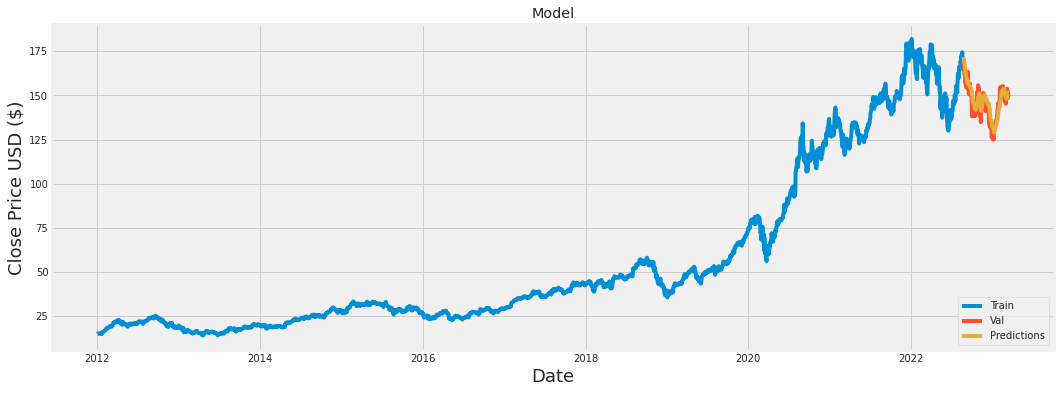

In [25]:
# Plota os dados
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualiza os dados
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [26]:
# Mostrar os preços válidos e previstos
valid

,Close,Predictions
Date,,
2022-08-22,167.570007,171.746231
2022-08-23,167.229996,171.001068
2022-08-24,167.529999,170.021713
2022-08-25,170.029999,169.173920
2022-08-26,163.619995,168.936417
...,...,...
2023-03-07,151.600006,149.666855
2023-03-08,152.869995,150.528412
2023-03-09,150.589996,151.352661


# Resumo
Neste notebook, você descobriu e explorou dados de ações.

Especificamente, você aprendeu:

Como carregar dados do mercado de ações do site YAHOO Finance usando yfinance.
Como explorar e visualizar dados de séries temporais usando Pandas, Matplotlib e Seaborn.
Como medir a correlação entre ações.
Como medir o risco de investir em uma determinada ação.
Você tem alguma pergunta? Faça suas perguntas nos comentários abaixo e farei o possível para responder.

Referências:
https://www.investopedia.com/terms/c/correlation.asp
[Jose Portilla Udemy Course: Learning Python for Data Analysis and Visualization](https://www.udemy.com/course/learning-python-for-data-analysis-and-visualization/)